# Лабораторна робота 3: Знайомство з нейромережами

**Викладач:** Наталія Сахненко

**Студент:** Зубко Дмитро Едуардович

## Опис завдання

Виконати наступне:
1. Повнозв'язані нейронні мережі:
Вирішіть завдання класифікації даних, з якими ви працювали в лабораторній № 1 за допомогою повнозв’язаної нейромережі прямого поширення (fully connected feed-forward network). Результати порівняйте з одержаними раніше. 

3. Згорткові нейронні мережі:
Вирішіть завдання класифікації зображень за допомогою згорткової (convolutional) нейромережі двома способами
а) навчить мережу з нуля (from scratch)
б) застосуйте перенесення навчання (transfer learning from pre-trained weights)
Порівняйте результати (якщо в обраному датасеті класів забагато, достатньо залишити 3-5).

4. Рекурентні нейронні мережі:
Вирішіть задачу класифікації текстів (з якими ви працювали в лабораторній № 2) за допомогою рекурентної нейромережі двома способами:
а) навчить мережу і embedding шар з нуля (from scratch)
б) використовуючи pretrained word embeddings
Результати порівняйте між собою і з одержаними раніш.

## Частина 1. Повнозв'язана нейронна мережа

In [1]:
#Імпорт бібліотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
import matplotlib.pyplot as plt

### Завантаження та обробка даних для повнозв’язаної нейромережі

In [2]:
# Завантаження та обробка даних для повнозв’язаної нейромережі
df = pd.read_csv('diabetes_prediction_dataset.csv')

# Перетворення категоріальних змінних
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = pd.Categorical(df[col]).codes

# Балансування даних
df_diabetes = df[df['diabetes'] == 1]
df_no_diabetes = df[df['diabetes'] == 0]
min_size = min(len(df_diabetes), len(df_no_diabetes))
df_balanced = pd.concat([df_diabetes.sample(n=min_size, random_state=42),
                         df_no_diabetes.sample(n=min_size, random_state=42)])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Виділення ознак та цільової змінної
X = df_balanced.drop('diabetes', axis=1)
y = df_balanced['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормалізація даних
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Створення повнозв’язаної нейронної мережі

In [3]:
# Створення повнозв’язаної нейронної мережі
model_fc = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_fc.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Навчання моделі
history_fc = model_fc.fit(X_train, y_train, epochs=32, batch_size=32, validation_split=0.2)

# Оцінка на тестових даних
y_pred_fc = (model_fc.predict(X_test) > 0.5).astype("int32")

Epoch 1/32
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - accuracy: 0.8547 - loss: 0.3477 - val_accuracy: 0.8893 - val_loss: 0.2480
Epoch 2/32
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.8786 - loss: 0.2553 - val_accuracy: 0.8901 - val_loss: 0.2439
Epoch 3/32
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.8930 - loss: 0.2355 - val_accuracy: 0.8923 - val_loss: 0.2310
Epoch 4/32
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.8917 - loss: 0.2238 - val_accuracy: 0.8923 - val_loss: 0.2166
Epoch 5/32
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.8895 - loss: 0.2196 - val_accuracy: 0.8952 - val_loss: 0.2097
Epoch 6/32
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.8939 - loss: 0.2145 - val_accuracy: 0.8982 - val_loss: 0.2006
Epoch 7/32
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.9004 - loss: 0.2040 - val_accuracy: 0.8993 - val_loss: 0.1964
Epoch 8/32
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.8999 - loss: 0.2022 - 

### Оцінка повнозв’язаної нейронної мережі

In [4]:
print("Матриця помилок для повнозв’язаної мережі:")
print(confusion_matrix(y_test, y_pred_fc))
print("\nЗвіт класифікації для повнозв’язаної мережі:")
print(classification_report(y_test, y_pred_fc))

Матриця помилок для повнозв’язаної мережі:
[[1517  185]
 [ 133 1565]]

Звіт класифікації для повнозв’язаної мережі:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1702
           1       0.89      0.92      0.91      1698

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400



### Візуалізація втрат для повнозв’язаної нейромережі

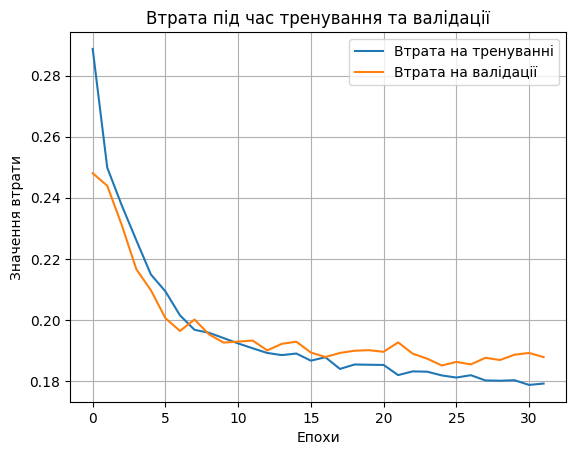

In [5]:
plt.plot(history_fc.history['loss'], label='Втрата на тренуванні')
plt.plot(history_fc.history['val_loss'], label='Втрата на валідації')
plt.title("Втрата під час тренування та валідації")
plt.xlabel("Епохи")
plt.ylabel("Значення втрати")
plt.legend()
plt.grid()
plt.show()

## Частина 2: Згорткова нейромережа (класифікація зображень)

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

### Підготовка даних

In [7]:
# Параметри
img_size = 224
batch_size = 16
num_classes = 6
epochs = 16

# Підготовка даних
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    validation_split=0.2
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    r'.\Bird Speciees Dataset',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    r'.\Bird Speciees Dataset',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 652 images belonging to 6 classes.
Found 159 images belonging to 6 classes.


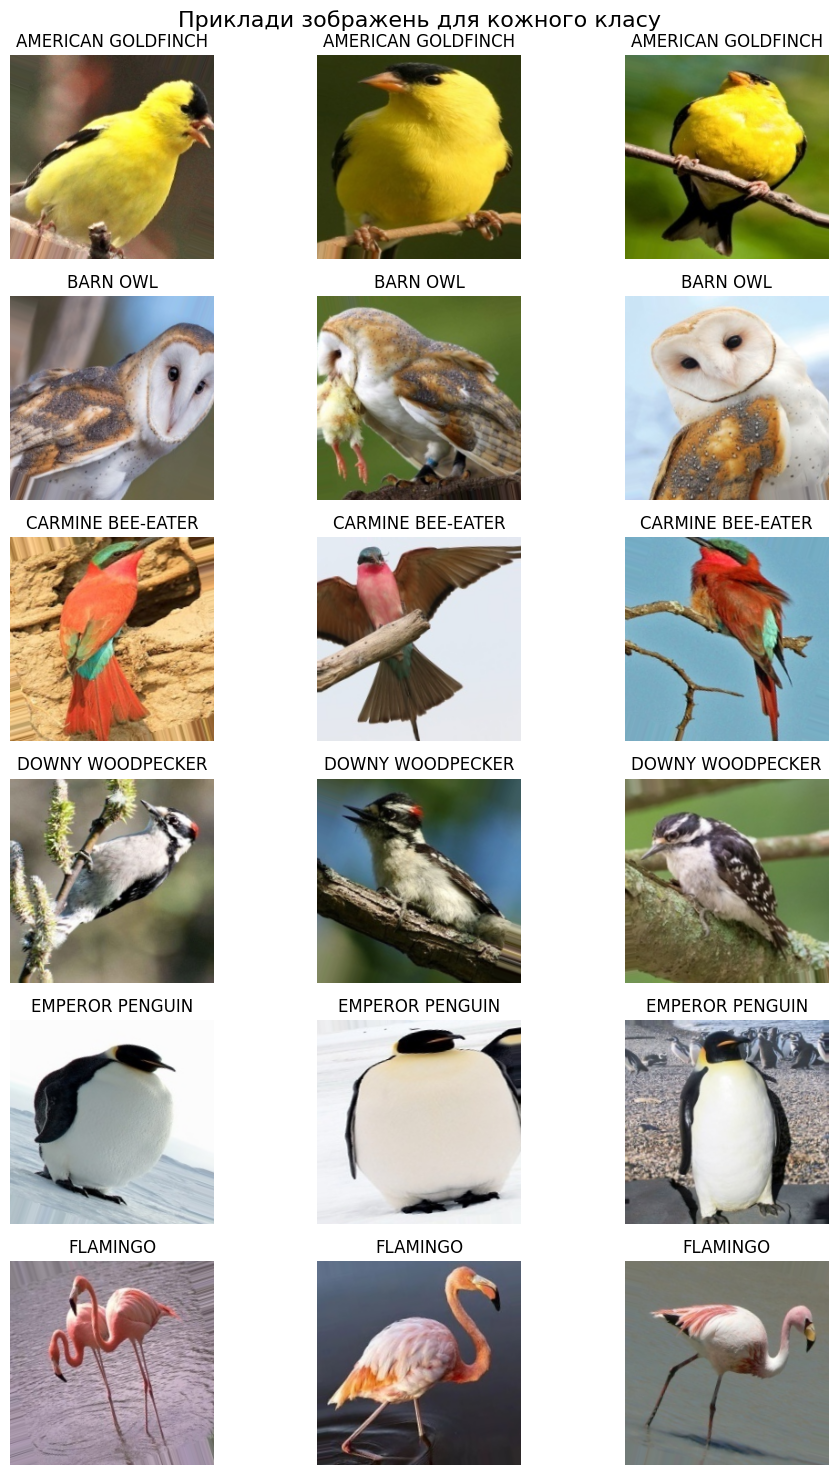

In [8]:
# Ініціалізація
fig, axs = plt.subplots(num_classes, 3, figsize=(10, 15))
fig.suptitle("Приклади зображень для кожного класу", fontsize=16)

# Одержання класів з генератора
class_names = list(train_generator.class_indices.keys())

# Пошук зображень для кожного класу
for i, class_name in enumerate(class_names):
    count = 0  # Лічильник для 3 зображень
    for images, labels in train_generator:
        # Ідентифікація зображень відповідного класу
        for j in range(len(labels)):
            if np.argmax(labels[j]) == i and count < 3:
                # Відображення зображення
                axs[i, count].imshow(images[j])
                axs[i, count].axis('off')
                axs[i, count].set_title(class_name)
                count += 1
        # Вихід після відображення 3 зображень для класу
        if count >= 3:
            break

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

### Створення згорткової нейромережі з нуля

In [9]:
# 1. Модель з нуля
def create_model_from_scratch():
    model = keras.Sequential([
        keras.layers.Input(shape=(img_size, img_size, 3)),
        keras.layers.Conv2D(32, 3, activation='relu'),
        keras.layers.MaxPooling2D(2),
        keras.layers.Conv2D(64, 3, activation='relu'),
        keras.layers.MaxPooling2D(2),
        keras.layers.Conv2D(64, 3, activation='relu'),
        keras.layers.MaxPooling2D(2),
        keras.layers.Conv2D(128, 3, activation='relu'),
        keras.layers.MaxPooling2D(2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Навчання моделі з нуля
model_scratch = create_model_from_scratch()

model_scratch.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,490,374 (9.50 MB)

 Trainable params: 2,490,374 (9.50 MB)

 Non-trainable params: 0 (0.00 B)

#### Навчання згорткової нейромережі з нуля

In [10]:
history_scratch = model_scratch.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

C:\Users\zubko\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/16
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 223ms/step - accuracy: 0.1907 - loss: 1.8445 - val_accuracy: 0.5535 - val_loss: 1.3236
Epoch 2/16
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 211ms/step - accuracy: 0.4840 - loss: 1.2649 - val_accuracy: 0.7233 - val_loss: 0.7149
Epoch 3/16
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 212ms/step - accuracy: 0.7499 - loss: 0.7487 - val_accuracy: 0.8428 - val_loss: 0.4237
Epoch 4/16
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 205ms/step - accuracy: 0.7752 - loss: 0.6068 - val_accuracy: 0.7358 - val_loss: 0.6352
Epoch 5/16
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 205ms/step - accuracy: 0.7804 - loss: 0.7033 - val_accuracy: 0.8679 - val_loss: 0.3887
Epoch 6/16
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 205ms/step - accuracy: 0.8566 - loss: 0.4961 - val_accuracy: 0.9119 - val_loss: 0.2619
Epoch 7/16
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 205ms/step - accuracy: 0.8423 - loss: 0.4216 - val_accuracy: 0.9560 - val_loss: 0.1844
Epoch 8/16
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 208ms/step - accuracy: 0.8962 - loss: 0.3336 - val_accuracy: 0

### Створення згорткової нейромережі з перенесенним навчанням

In [11]:
# 2. Модель з перенесенням навчання
def create_transfer_learning_model():
    base_model = VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(img_size, img_size, 3)
    )
    base_model.trainable = False

    model = keras.Sequential([
        base_model,
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Навчання моделі з перенесенням навчання
model_transfer = create_transfer_learning_model()
model_transfer.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,558 (56.64 MB)

 Trainable params: 132,870 (519.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

#### Навчання згорткової нейромережі з перенесенним навчанням

In [12]:
history_transfer = model_transfer.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

Epoch 1/16
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 921ms/step - accuracy: 0.2385 - loss: 1.8144 - val_accuracy: 0.8742 - val_loss: 1.1636
Epoch 2/16
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 916ms/step - accuracy: 0.6263 - loss: 1.1780 - val_accuracy: 0.8868 - val_loss: 0.7464
Epoch 3/16
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 924ms/step - accuracy: 0.7860 - loss: 0.8236 - val_accuracy: 0.9497 - val_loss: 0.5111
Epoch 4/16
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 912ms/step - accuracy: 0.8621 - loss: 0.6293 - val_accuracy: 0.9245 - val_loss: 0.4317
Epoch 5/16
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 915ms/step - accuracy: 0.8629 - loss: 0.5140 - val_accuracy: 0.9497 - val_loss: 0.3293
Epoch 6/16
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 911ms/step - accuracy: 0.8827 - loss: 0.4526 - val_accuracy: 0.9560 - val_loss: 0.2571
Epoch 7/16
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 909ms/step - accuracy: 0.9166 - loss: 0.3478 - val_accuracy: 0.9686 - val_loss: 0.2154
Epoch 8/16
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 910ms/step - accuracy: 0.9139 - loss: 0.3249 - val_accu

### Візуалізація та порівняння результатів

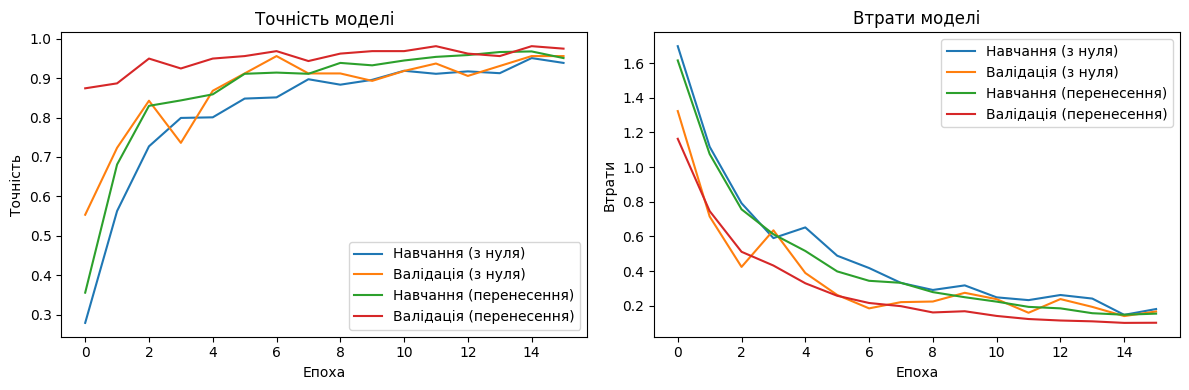

In [13]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_scratch.history['accuracy'], label='Навчання (з нуля)')
plt.plot(history_scratch.history['val_accuracy'], label='Валідація (з нуля)')
plt.plot(history_transfer.history['accuracy'], label='Навчання (перенесення)')
plt.plot(history_transfer.history['val_accuracy'], label='Валідація (перенесення)')
plt.title('Точність моделі')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_scratch.history['loss'], label='Навчання (з нуля)')
plt.plot(history_scratch.history['val_loss'], label='Валідація (з нуля)')
plt.plot(history_transfer.history['loss'], label='Навчання (перенесення)')
plt.plot(history_transfer.history['val_loss'], label='Валідація (перенесення)')
plt.title('Втрати моделі')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()

plt.tight_layout()
plt.show()

## Частина 3. Рекурентна нейронна мережа

In [14]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Adam

### Завантаження та обробка даних

In [15]:
# Завантаження даних
df = pd.read_csv("googleplaystore_user_reviews.csv")

# Попередня обробка тексту
def clean_text(text):
    if pd.isna(text):
        return ""
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

df['cleaned_review'] = df['Translated_Review'].apply(clean_text)
df = df[df['cleaned_review'] != ""]

# Перетворення Sentiment на числові значення
label_encoder = LabelEncoder()
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])

# Параметри
max_words = 5000
max_len = 100
embedding_dim = 100

# Токенізація текстів
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['cleaned_review'])
sequences = tokenizer.texts_to_sequences(df['cleaned_review'])
X = pad_sequences(sequences, maxlen=max_len)
y = df['Sentiment']

# Розділення на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Модель з нуля з навчанням embedding-шару

In [16]:
model_scratch = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim),
    LSTM(64, return_sequences=True),
    Dropout(0.5),
    LSTM(64),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 класи
])

model_scratch.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Навчання моделі з нуля...")
history_scratch = model_scratch.fit(X_train, y_train, epochs=5, validation_split=0.2, batch_size=32)

Навчання моделі з нуля...
Epoch 1/5
745/745 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.7012 - loss: 0.7288 - val_accuracy: 0.8986 - val_loss: 0.2971
Epoch 2/5
745/745 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.9329 - loss: 0.2234 - val_accuracy: 0.9377 - val_loss: 0.1978
Epoch 3/5
745/745 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.9623 - loss: 0.1391 - val_accuracy: 0.9447 - val_loss: 0.1981
Epoch 4/5
745/745 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.9741 - loss: 0.1011 - val_accuracy: 0.9387 - val_loss: 0.2385
Epoch 5/5
745/745 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.9759 - loss: 0.0911 - val_accuracy: 0.9410 - val_loss: 0.2581


#### Оцінка моделі з нуля

In [17]:
y_pred_scratch = np.argmax(model_scratch.predict(X_test), axis=1)
print(classification_report(y_test, y_pred_scratch, target_names=label_encoder.classes_))

233/233 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
              precision    recall  f1-score   support

    Negative       0.88      0.89      0.89      1597
     Neutral       0.95      0.86      0.90      1047
    Positive       0.95      0.97      0.96      4798

    accuracy                           0.94      7442
   macro avg       0.93      0.91      0.92      7442
weighted avg       0.94      0.94      0.94      7442



### 2. Модель з використанням pretrained word embeddings

In [18]:
# Завантаження GloVe embeddings (приклад використання pretrained embeddings)
embedding_index = {}
with open('glove.6B.100d.txt', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Створення embedding матриці
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Модель з попередньо натренованими embeddings
model_pretrained = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, weights=[embedding_matrix], trainable=False),
    LSTM(64, return_sequences=True),
    Dropout(0.5),
    LSTM(64),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model_pretrained.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
print("Навчання моделі з попередньо натренованими embeddings...")
history_pretrained = model_pretrained.fit(X_train, y_train, epochs=5, validation_split=0.2, batch_size=32)

Навчання моделі з попередньо натренованими embeddings...
Epoch 1/5
745/745 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6828 - loss: 0.7336 - val_accuracy: 0.8085 - val_loss: 0.4768
Epoch 2/5
745/745 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.8135 - loss: 0.4675 - val_accuracy: 0.8477 - val_loss: 0.3944
Epoch 3/5
745/745 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.8429 - loss: 0.4075 - val_accuracy: 0.8623 - val_loss: 0.3728
Epoch 4/5
745/745 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.8656 - loss: 0.3545 - val_accuracy: 0.8598 - val_loss: 0.3710
Epoch 5/5
745/745 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.8778 - loss: 0.3225 - val_accuracy: 0.8636 - val_loss: 0.3644


In [20]:
print("Оцінка моделі з pretrained embeddings:")
y_pred_pretrained = np.argmax(model_pretrained.predict(X_test), axis=1)
print(classification_report(y_test, y_pred_pretrained, target_names=label_encoder.classes_))

Оцінка моделі з pretrained embeddings:
233/233 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
              precision    recall  f1-score   support

    Negative       0.75      0.84      0.79      1597
     Neutral       0.73      0.89      0.80      1047
    Positive       0.96      0.87      0.91      4798

    accuracy                           0.87      7442
   macro avg       0.81      0.87      0.84      7442
weighted avg       0.88      0.87      0.87      7442

